In [122]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


# Set random seed for reproducibility
np.random.seed(42)

# Creating Artificial Dataset for Binary Classification using Blobs

In this notebook, we'll create a synthetic blob-based dataset for binary classification and build a simple deep learning model to classify the data.

In [123]:
# Create artificial dataset for classification using make_blobs
print("Creating blob-based dataset for classification...")

# Create blob clusters for classification
X, y = make_blobs(
    n_samples=2000,           # Number of samples
    centers=3,                # Number of centers (classes)
    cluster_std=2,         # Standard deviation of clusters
    center_box=(-5.0, 5.0),  # Box in which to place centers
    random_state=42          # For reproducibility
)

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Classes distribution: {np.unique(y, return_counts=True)}")

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

print("\nFirst 5 rows of the dataset:")
print(df.head())

Creating blob-based dataset for classification...
Dataset shape: (2000, 2)
Target shape: (2000,)
Classes distribution: (array([0, 1, 2]), array([667, 667, 666]))

First 5 rows of the dataset:
   Feature_1  Feature_2  Target
0   2.062864  -2.777113       1
1   3.402865   2.504895       1
2  -0.382209  -1.658331       1
3  -3.547623  -5.404662       2
4   0.543293  -5.104177       2


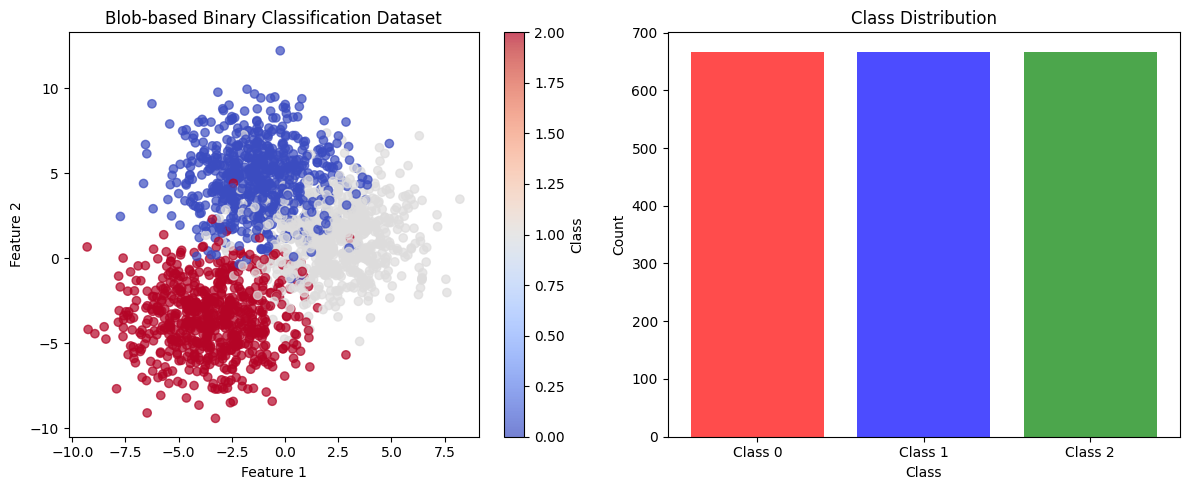

In [124]:
# Visualize the blob dataset
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot of the two features colored by class
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blob-based Binary Classification Dataset')
plt.colorbar(scatter, label='Class')

# Plot 2: Distribution of classes
plt.subplot(1, 2, 2)
class_counts = np.unique(y, return_counts=True)[1]
class_labels = [f'Class {i}' for i in range(len(class_counts))]
colors = ['red', 'blue', 'green'][:len(class_counts)]
plt.bar(class_labels, class_counts, color=colors, alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

In [125]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% for testing
    random_state=42,   # For reproducibility
    stratify=y         # Maintain class distribution in both sets
)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalization completed!")
print("Original feature ranges:")
print(f"Feature 1: [{X_train[:, 0].min():.2f}, {X_train[:, 0].max():.2f}]")
print(f"Feature 2: [{X_train[:, 1].min():.2f}, {X_train[:, 1].max():.2f}]")

print("Normalized feature ranges:")
print(f"Feature 1: [{X_train_scaled[:, 0].min():.2f}, {X_train_scaled[:, 0].max():.2f}]")
print(f"Feature 2: [{X_train_scaled[:, 1].min():.2f}, {X_train_scaled[:, 1].max():.2f}]")

Normalization completed!
Original feature ranges:
Feature 1: [-9.30, 8.22]
Feature 2: [-9.42, 12.21]
Normalized feature ranges:
Feature 1: [-2.76, 2.92]
Feature 2: [-2.64, 2.98]


In [126]:
# Build a neural network that adapts to the number of classes
def create_neural_network(input_dim, num_classes):
    if num_classes == 2:
        # Binary classification
        model = Sequential([
            # Input layer + Hidden layer 1
            Dense(8, input_dim=input_dim, activation='relu', name='hidden_1'),
            
            # Hidden layer 2
            Dense(4, activation='relu', name='hidden_2'),
            
            # Output layer for binary classification (1 neuron with sigmoid)
            Dense(1, activation='sigmoid', name='output')
        ])
    else:
        # Multi-class classification
        model = Sequential([
            # Input layer + Hidden layer 1
            Dense(8, input_dim=input_dim, activation='relu', name='hidden_1'),
            
            # Hidden layer 2
            Dense(4, activation='relu', name='hidden_2'),
            
            # Output layer for multi-class classification (num_classes neurons with softmax)
            Dense(num_classes, activation='softmax', name='output')
        ])
    
    return model

# Determine the number of classes automatically
num_classes = len(np.unique(y))
print(f"Number of classes detected: {num_classes}")

# Create the model
input_features = X_train_scaled.shape[1]
model = create_neural_network(input_features, num_classes)

# Compile the model with appropriate loss function and optimizer
if num_classes == 2:
    # Binary classification
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
else:
    # Multi-class classification
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',  # For integer labels
        metrics=['accuracy']
    )

print("Neural Network Architecture:")
model.summary()

Number of classes detected: 3
Neural Network Architecture:


/home/thomas/Bureau/Spe-IA/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75 (300.00 B)

 Trainable params: 75 (300.00 B)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,     # Training data
    epochs=100,                  # Number of training epochs
    batch_size=32,               # Batch size for training
    validation_data=(X_test_scaled, y_test),  # Validation data
    verbose=1                    # Show training progress
)

print("\nTraining completed!")

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.7443 - val_accuracy: 0.8975 - val_loss: 0.4613
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.3666 - val_accuracy: 0.9000 - val_loss: 0.2994
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.2927 - val_accuracy: 0.8950 - val_loss: 0.2764
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.2709 - val_accuracy: 0.9025 - val_loss: 0.2705
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.2621 - val_accuracy: 0.8850 - val_loss: 0.2591
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2587 - val_accuracy: 0.9000 - val_loss: 0.2590
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.2586 - val_accuracy: 0.9025 - val_loss: 0.2570
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8988 - loss: 0.2545 - val_accuracy: 0.8975 - v

In [128]:
# Make predictions
y_pred_prob = model.predict(X_test_scaled)

if num_classes == 2:
    # Binary classification - threshold at 0.5
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
else:
    # Multi-class classification - take argmax
    y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy: 0.8900
Test Loss: 0.2519
Confusion Matrix:
[[118  16   0]
 [ 13 115   5]
 [  0  10 123]]


3784/3784 ━━━━━━━━━━━━━━━━━━━━ 2s 586us/step


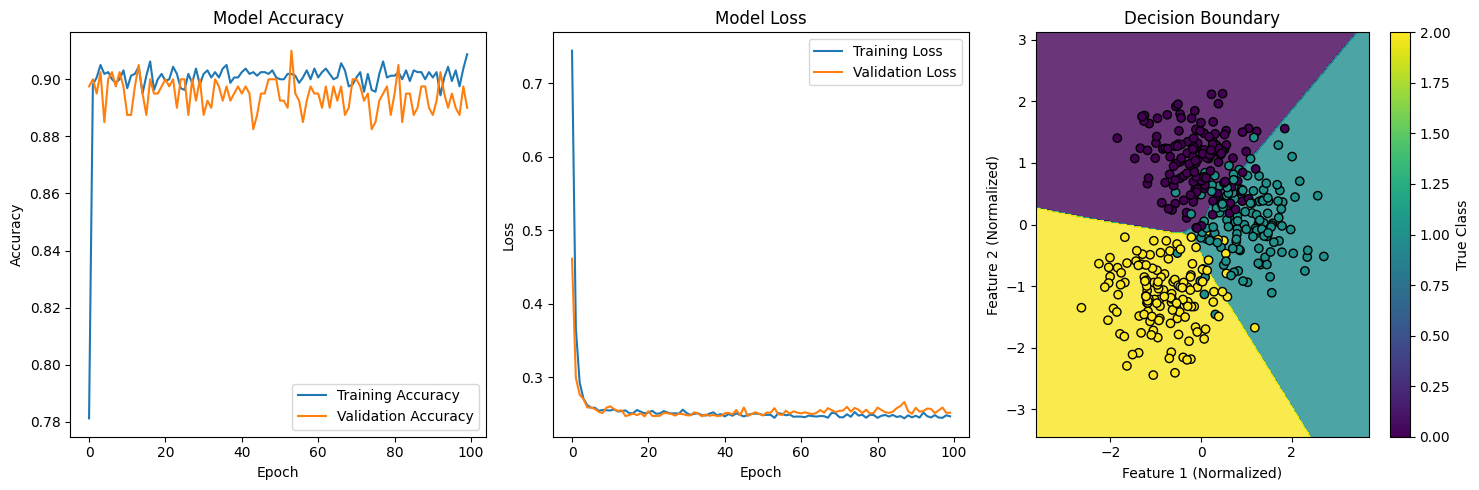

In [129]:
# Visualize training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot decision boundary
plt.subplot(1, 3, 3)
# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z_prob = model.predict(mesh_points)

if num_classes == 2:
    # Binary classification - use probabilities directly
    Z = Z_prob.reshape(xx.shape)
    cmap_name = 'coolwarm'
else:
    # Multi-class classification - use class predictions
    Z = np.argmax(Z_prob, axis=1).reshape(xx.shape)
    cmap_name = 'viridis'

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=cmap_name)
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_name, edgecolors='black')
plt.colorbar(scatter, label='True Class')
plt.title('Decision Boundary')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')

plt.tight_layout()
plt.show()